In [13]:
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('data/books.csv')
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
df.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

# Average rating histogram

I would like to see if there is a normal curve or if there is a tendency of high values or low values. As we can see most values are between 3.5 and 4.5 with the a mean of 4. Since we have mean, median and mode very similar, we can assume this is a normal distribuiton with 0.25 of standard deviation. 

Important to notice 

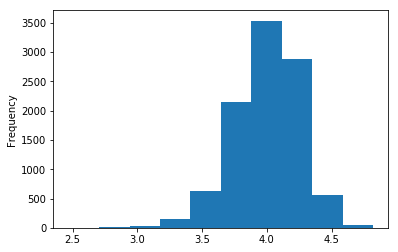

In [14]:
df.average_rating.plot.hist()

In [24]:
df.average_rating.describe()

count    10000.000000
mean         4.002191
std          0.254427
min          2.470000
25%          3.850000
50%          4.020000
75%          4.180000
max          4.820000
Name: average_rating, dtype: float64

In [25]:
print('Mode:', df.average_rating.mode())

Mode: 0    3.94
dtype: float64


# Does language influence on rating?

In [33]:
lang_titles_count = df.groupby(['language_code'])['title'].count()

In [34]:
average_rating_per_lang = df.groupby(['language_code'])['average_rating'].mean()

In [39]:
lang_vs_rating = pd.concat([lang_titles_count, average_rating_per_lang], axis=1, sort=False)
lang_vs_rating.sort_values(by='title', ascending=False)[0:10]

,title,average_rating
language_code,,
eng,6341,4.007469
en-US,2070,3.993589
en-GB,257,3.993852
ara,64,3.807500
en-CA,58,3.937241
fre,25,3.945600
ind,21,4.003810
spa,20,3.930000
ger,13,4.003846
